# Exploratory Data Analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Loading the Dataset

In [70]:
IndividualCases = pd.read_csv("dataset/processed_individual_cases_Sep20th2020.csv", parse_dates=["date_confirmation"])
ProcessedLocations = pd.read_csv("dataset/processed_location_Sep20th2020.csv")

# Analyzing the Dataset head

In [71]:
IndividualCases.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Gujarat,India,23.02776,72.60027,15.04.2020,NaN,https://gujcovid19.gujarat.gov.in/uploads/pres...,hospitalized
1,21.0,male,Moyobamba,Peru,-6.03271,-76.97230,09.05.2020,NaN,NaN,nonhospitalized
2,94.0,female,Lima,Peru,-12.04318,-77.02824,15.04.2020,NaN,NaN,nonhospitalized
3,NaN,NaN,Gujarat,India,23.02776,72.60027,22.05.2020,NaN,https://www.deshgujarat.com/2020/05/22/gujarat...,hospitalized
4,2.0,female,Coronel Portillo,Peru,-8.40921,-74.55572,30.04.2020,NaN,NaN,nonhospitalized


In [72]:
ProcessedLocations.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.03390,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.20270,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265


# Printing Information about DataFrame Columns for each DataSet

In [73]:
IndividualCases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557364 entries, 0 to 557363
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     260490 non-null  object 
 1   sex                     263630 non-null  object 
 2   province                550796 non-null  object 
 3   country                 557340 non-null  object 
 4   latitude                557362 non-null  float64
 5   longitude               557362 non-null  float64
 6   date_confirmation       556902 non-null  object 
 7   additional_information  34395 non-null   object 
 8   source                  348173 non-null  object 
 9   outcome                 557364 non-null  object 
dtypes: float64(2), object(8)
memory usage: 42.5+ MB


## Preliminary IndividualCases Results :
#### 1. The age is classified as object and not a integer or float type.<br> 2. The latitude and longitude are classified as float type. <br>3. The plots can only be drawn for latitude and longitude. Additional cleaning needs to be done for plotting graphs for age and date.

In [9]:
ProcessedLocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954 entries, 0 to 3953
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province_State       3786 non-null   object 
 1   Country_Region       3954 non-null   object 
 2   Last_Update          3954 non-null   object 
 3   Lat                  3874 non-null   float64
 4   Long_                3874 non-null   float64
 5   Confirmed            3954 non-null   int64  
 6   Deaths               3954 non-null   int64  
 7   Recovered            3954 non-null   int64  
 8   Active               3952 non-null   float64
 9   Combined_Key         3954 non-null   object 
 10  Incidence_Rate       3874 non-null   float64
 11  Case-Fatality_Ratio  3906 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 370.8+ KB


## Preliminary ProcessedLocations Results:
#### 1. The data has cleaner types than Individual Cases Dataset.<br> 2. Indicates little to no noise in type of dataset as Latitude is identified as float and Deaths as int. Note: This is only preliminary analysis results. No outliers and other noises are found yet.


## Statistics for all Attributes of both datasets:

In [10]:
IndividualCases.describe()

,latitude,longitude
count,557362.000000,557362.000000
mean,18.138385,27.285771
std,20.455801,67.577194
min,-54.808030,-159.727596
25%,11.042850,-58.473080
50%,19.036810,72.834830
75%,28.456000,77.209100
max,70.071800,174.740000


In [11]:
ProcessedLocations.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3874.000000,3874.000000,3.954000e+03,3954.000000,3.954000e+03,3.952000e+03,3874.000000,3906.000000
mean,35.987924,-72.337046,7.760496e+03,241.740769,5.291398e+03,2.228632e+03,1538.572813,2.355818
std,12.872793,53.019022,4.184036e+04,1476.661533,5.315287e+04,4.440693e+04,1368.457332,3.538503
min,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-2.577446e+06,0.000000,0.000000
25%,33.270421,-96.611164,1.370000e+02,1.000000,0.000000e+00,1.140000e+02,618.904146,0.637729
50%,37.938284,-86.878438,4.985000e+02,9.000000,0.000000e+00,4.210000e+02,1204.351179,1.633422
75%,42.158587,-77.639009,2.129000e+03,48.000000,0.000000e+00,1.453000e+03,2097.993633,3.006621
max,71.706900,178.065000,1.167496e+06,37076.000000,2.577446e+06,3.379130e+05,14871.183644,108.812950


In [12]:
IndividualCasesCorrelation = IndividualCases.corr()

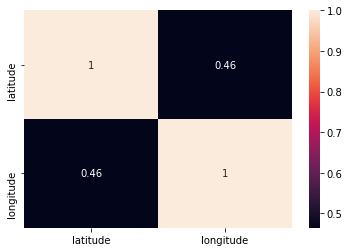

In [13]:
sns.heatmap(IndividualCasesCorrelation, annot = True)

## Individual Cases Dataset
#### The above graph shows the correlation coefficient between latitude and longitude. The correlation coefficient = 0.46 indicating the low correlation between latitude and longitude. This outcome is justifiable as latitude and longitude are datapoints to indicate location. A more useful analysis would be to compare correlation between location(lattitude and longitude) and age. At this early analysis stage, the type of age is not integer or float. Thus, the correlation Analysis can be performed after Data Cleaning step.

In [14]:
ProcessedLocationsCorrelation = ProcessedLocations.corr()

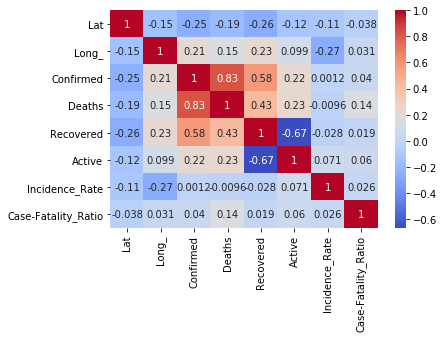

In [16]:
sns.heatmap(ProcessedLocationsCorrelation, annot = True, cmap= 'coolwarm')

## Processed Location Dataset
#### The above graph shows the correlation among different attributes of Processes Location dataset.<br> Some useful insights:<br>1. The correlation coefficient between Deaths and Confirmed is 0.83. This value represents strong correlation between these two attributes, indicationg as the number of confirmed cases increases, deaths also increases.<br>2. The correaltion coefficient between Attributes Recovered and Active is -0.67 indicating as the Recoveries increases, active cases decreases.

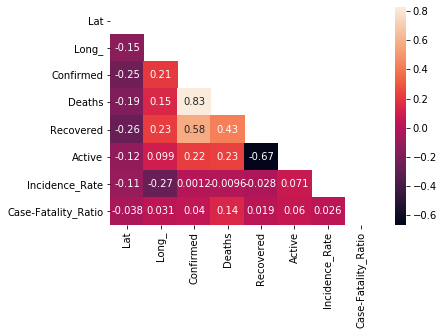

In [17]:
ProcessedLocationsmatrix = np.triu(ProcessedLocationsCorrelation)
sns.heatmap(ProcessedLocationsCorrelation, annot=True, mask=ProcessedLocationsmatrix)

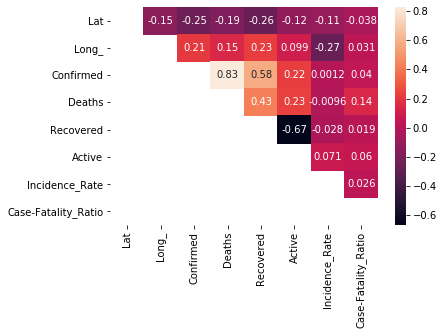

In [18]:
ProcessedLocationsmatrix = np.tril(ProcessedLocationsCorrelation)
sns.heatmap(ProcessedLocationsCorrelation, annot=True, mask=ProcessedLocationsmatrix)

# Box Plots of Individual Case Dataset

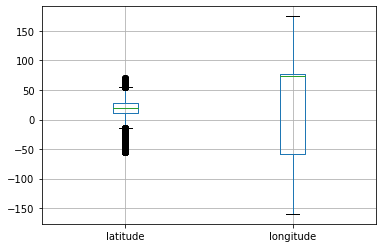

In [58]:
IndividualCases.boxplot()

### The graph below shows the counts of covid-19 confirmations on different dates, the graph shows uneven numbers on different dates indicating no solid realtionship between the dates the covid-19 was confirmed. 

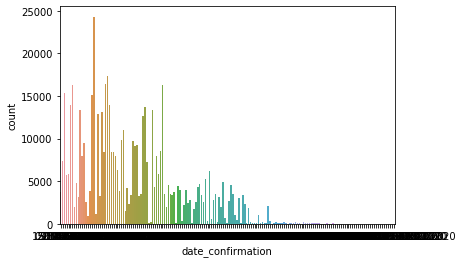

In [104]:
Date_Count = IndividualCases.dropna(subset = ["date_confirmation"])
Date_Count = Date_Count.drop(columns =['age','sex','province','country','latitude','longitude','additional_information','source'])
sns.countplot(Date_Count["date_confirmation"])

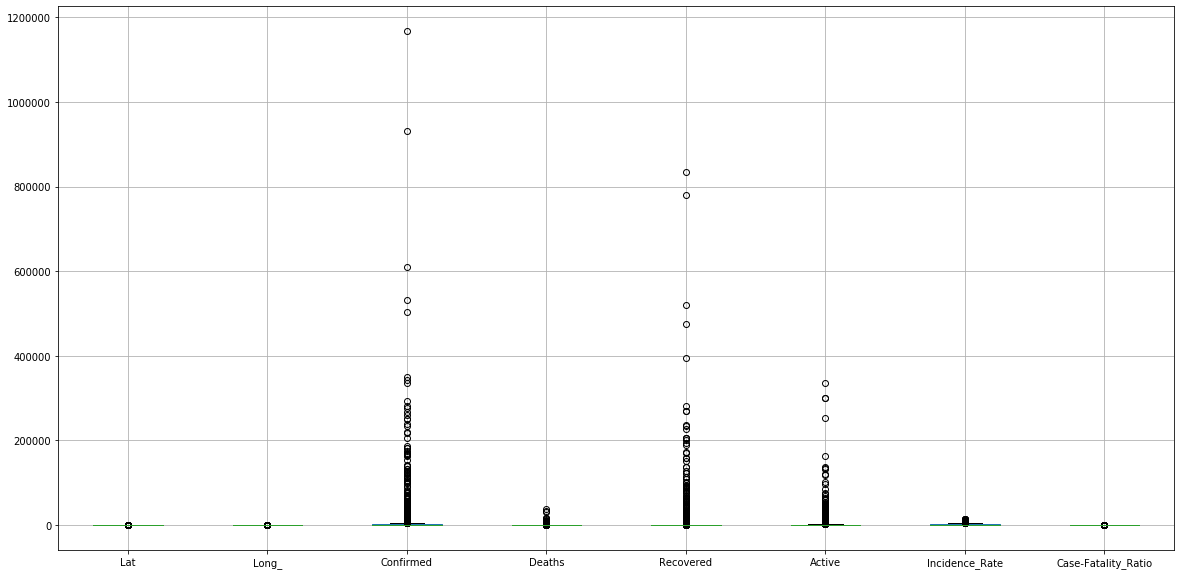

In [153]:
NoNAProcessedLocations = ProcessedLocations.dropna()
NoNAProcessedLocations.boxplot(figsize=(20,10))

# Confirmed VS Deaths

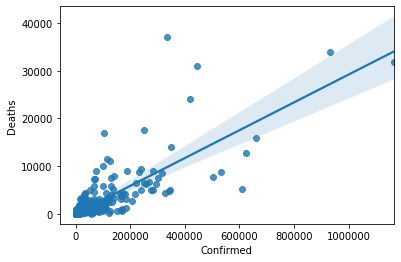

In [154]:
sns.regplot(x ="Confirmed", y="Deaths", data=ConfirmedDeaths)

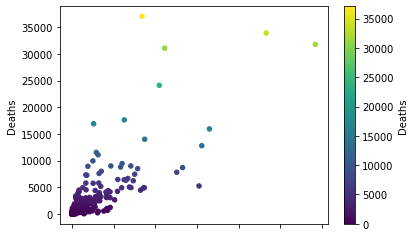

In [155]:
ConfirmedDeaths.plot.scatter(x='Confirmed', y='Deaths',c='Deaths',colormap='viridis')

# Confirmed VS Recovered

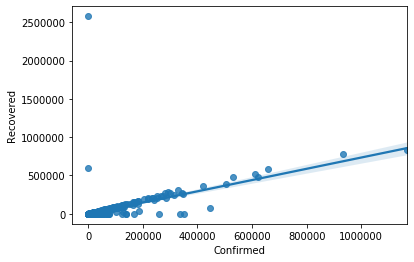

In [137]:
ConfirmedRecovered = ProcessedLocations[['Confirmed', 'Recovered']]
sns.regplot(x ="Confirmed", y="Recovered", data=ConfirmedRecovered)

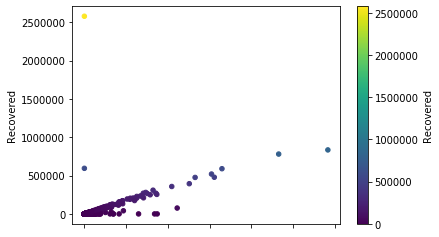

In [157]:
ConfirmedRecovered.plot.scatter(x='Confirmed', y='Recovered',c='Recovered',colormap='viridis')

# Confirmed VS Active

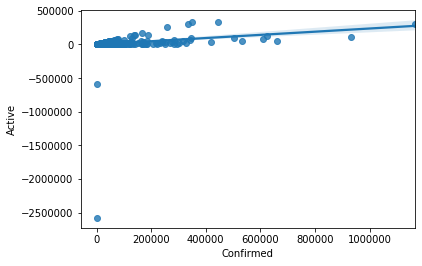

In [138]:
ConfirmedActive = ProcessedLocations[['Confirmed', 'Active']]
sns.regplot(x ="Confirmed", y="Active", data=ConfirmedActive)

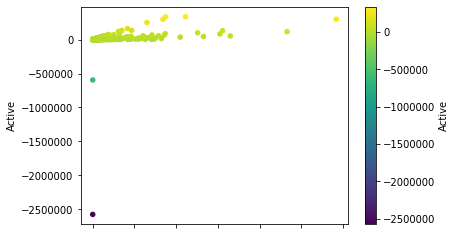

In [151]:
ConfirmedActive.plot.scatter(x='Confirmed', y='Active',c='Active',colormap='viridis')

# Active VS Case-Fatality_Ratio

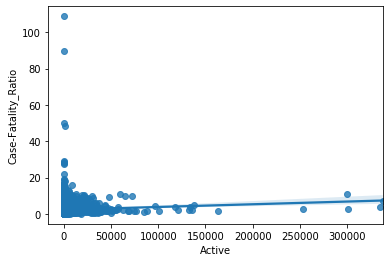

In [140]:
ActiveDeathRatio = ProcessedLocations[['Active', 'Case-Fatality_Ratio']]
sns.regplot(x ="Active", y="Case-Fatality_Ratio", data=ActiveDeathRatio)

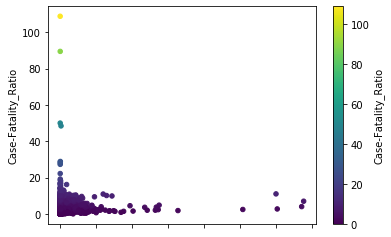

In [162]:
ActiveDeathRatio.plot.scatter(x='Active', y='Case-Fatality_Ratio',c='Case-Fatality_Ratio',colormap='viridis')

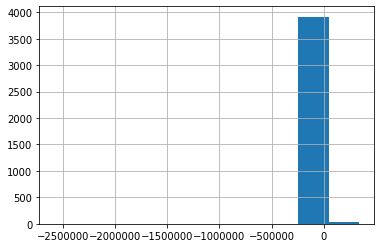

In [141]:
ProcessedLocations["Active"].hist()

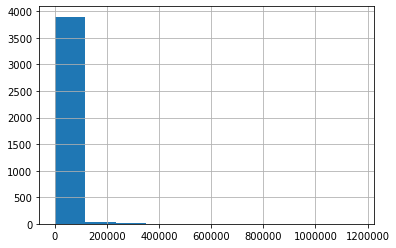

In [142]:
ProcessedLocations["Confirmed"].hist()

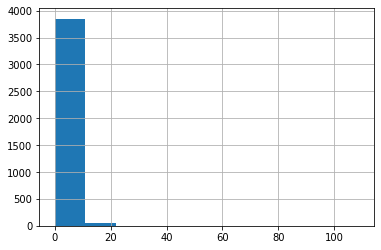

In [143]:
ProcessedLocations["Case-Fatality_Ratio"].hist()

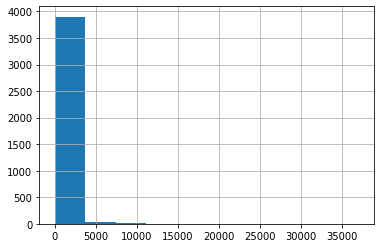

In [144]:
ProcessedLocations["Deaths"].hist()

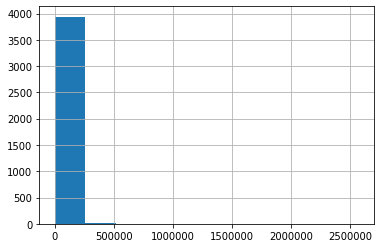

In [145]:
ProcessedLocations["Recovered"].hist()

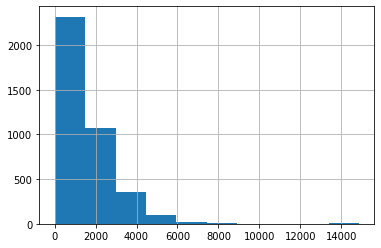

In [146]:
ProcessedLocations["Incidence_Rate"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7aac7750>,
      dtype=object)

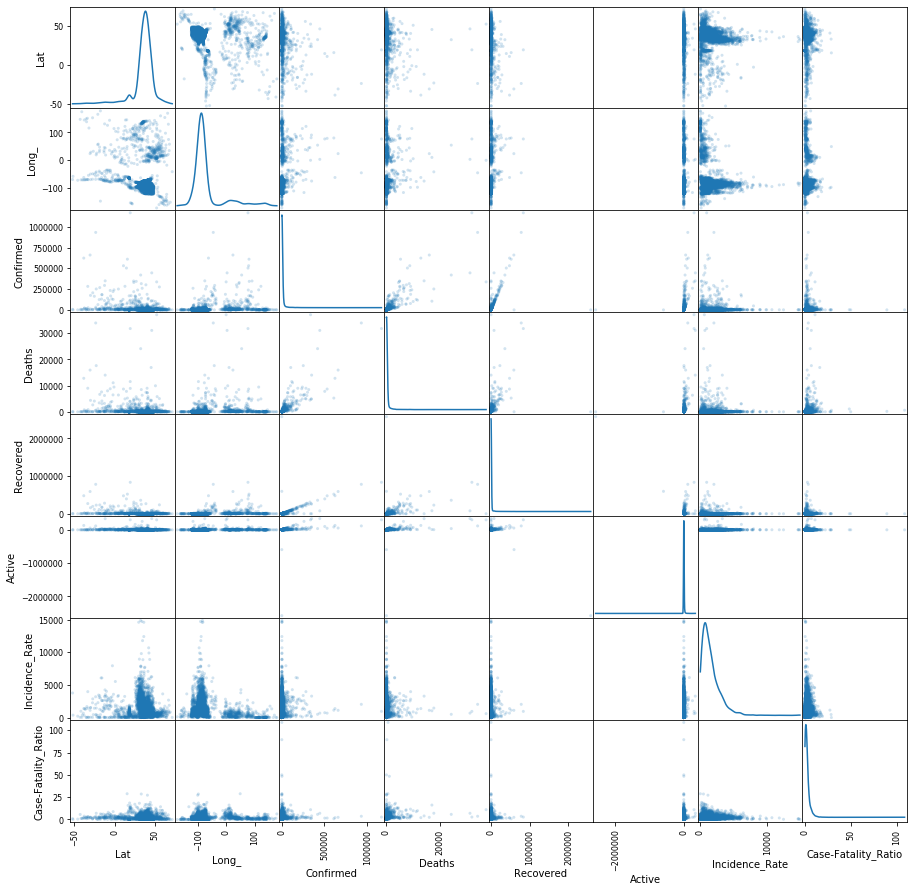

In [43]:
scatter_matrix(ProcessedLocations, alpha=0.2, figsize=(15, 15), diagonal='kde')

# Number of missing values in each column for each Dataset

In [163]:
IndividualCases.isnull().sum(axis = 0)

age                       296874
sex                       293734
province                    6568
country                       24
latitude                       2
longitude                      2
date_confirmation            462
additional_information    522969
source                    209191
outcome                        0
dtype: int64

In [164]:
ProcessedLocations.isnull().sum(axis = 0)

Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64